<a href="https://colab.research.google.com/github/sebmcas/Mineria_de_datos/blob/main/Clusters_Y_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. INTRODUCCIÓN**

A continuación se aplicarán técnicas de reducción de dimensionalidad (PCA) y agrupamiento (Clustering) sobre el dataset "Penguins" de seaborn, el cual contiene características físicas de tres especies de pinguinos.

Descripción de las variables:

1. species: Adelie, Chinstrap, Gentoo
2. island: Biscoe, Dream, Torgesen
3. bill_length_mm: Longitud del pico en milímetros
4. flipper_length_mm:Longitud de la aleta en milímetros
5. body_mass_g: Masa corporal del pingüino en gramos
6. sex: Male, Female


**2. PREPROCESAMIENTO**

En esta sección se realizará un análisis exploratorio y limpieza del dataset, preparando la data para la aplicación del PCA y clustering en secciones posteriores.



In [154]:
# Importamos librerías

#import os
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from scipy.spatial import distance

import warnings
warnings.filterwarnings("ignore")

In [155]:
# Cargamos el dataset desde la librería Seaborn
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [156]:
# Separamos en variables numéricas y categóricas

var_num = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
var_cat = ['species ','island','sex']

In [157]:
# Realizamos un análisis descriptivo sobre las variables numéricas

df[var_num].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [158]:
# Analizamos la cantidad de nulos en las variables numéricas

pd.DataFrame({'Nulos' : df[var_num].isnull().sum()})

,Nulos
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2


In [159]:
# Notamos que tenemos dos filas completamente nulas

df[var_num][df[var_num].isna().any(axis=1)]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
3,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN


In [160]:



# Eliminamos las filas que no aportan información
df = df.drop([3,339])

# Guardamos la especie en un nuevo dataframe
df_especies = df['species']

# Nos quedamos con las variables numéricas
df = df[var_num]

df.reset_index(drop=True, inplace=True)
df_especies.reset_index(drop=True, inplace=True)

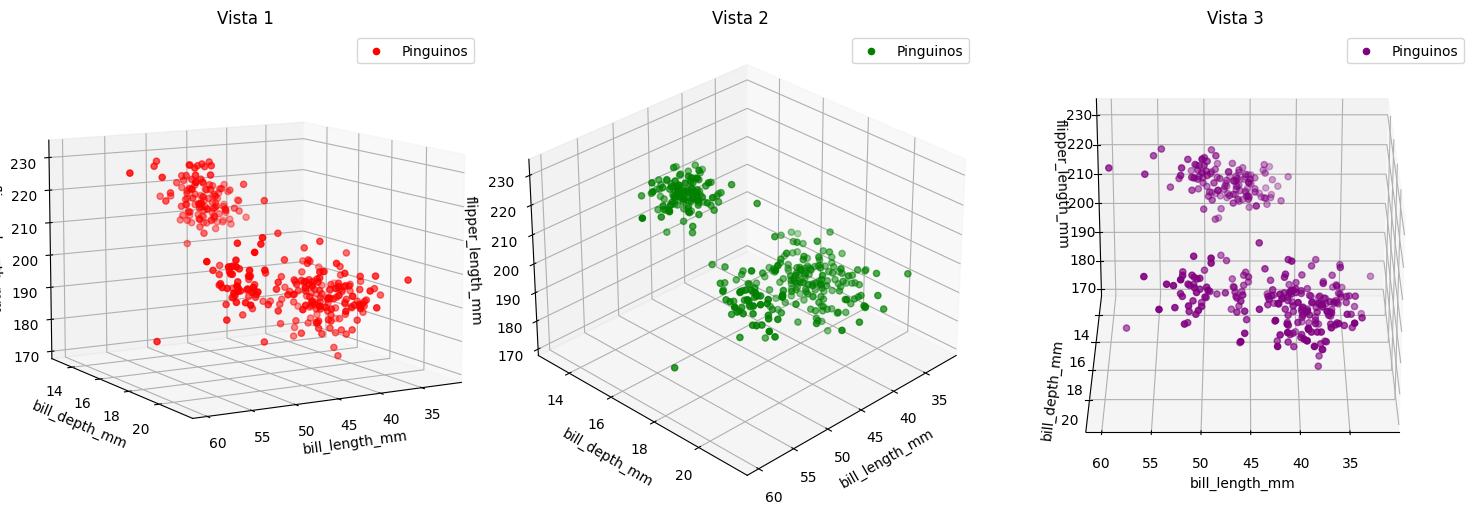

In [161]:
# Realizamos un gráfico de dispresión en 3D con las variables bill_length_mm	bill_depth_mm	flipper_length_mm	para ver como se distribuyen las muestras

fig = plt.figure(figsize=(15, 5))

# Configuración de vistas
Vistas = [(10, 60, 'Vista 1', 'red'), (30, 45, 'Vista 2', 'green'), (25, 90, 'Vista 3', 'purple')]

# Iteramos para generar 3 gráficas 3D
for i, (elev, azim, title, color) in enumerate(Vistas, 1):
    ax = fig.add_subplot(130 + i, projection='3d')
    scatter = ax.scatter(df['bill_length_mm'], df['bill_depth_mm'], df['flipper_length_mm'], c=color, marker='o')
    ax.set_xlabel('bill_length_mm')
    ax.set_ylabel('bill_depth_mm')
    ax.set_zlabel('flipper_length_mm')
    ax.set_title(title)
    ax.legend([scatter], ['Pinguinos'])
    ax.view_init(elev=elev, azim=azim)
plt.tight_layout()
plt.show()


Notamos que aparentemente se forman tres grupos en el gráfico de dispersión, que coincide con la cantidad de especies de pinguinos en el dataset.

**3. ANÁLISIS DE COMPONENTES PRINCIPALES**

En esta sección se realizará un análisis de componenetes principales para reducir la cantidad de variables.



<Axes: >

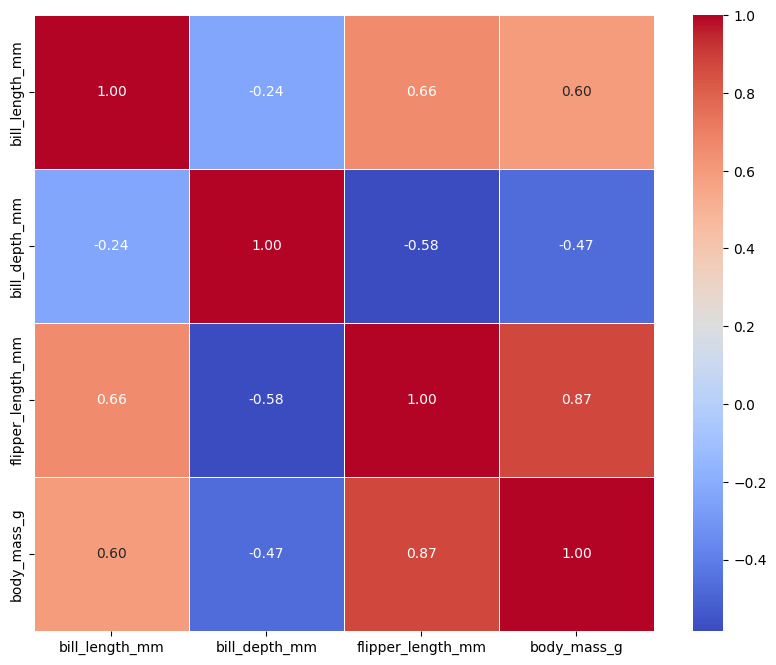

In [162]:
# Matriz de correlaciones

Matriz_Correlacion = df.corr()
Matriz_Correlacion
plt.figure (figsize =(10,8))
sns.heatmap (Matriz_Correlacion, annot =True , cmap = 'coolwarm' , fmt ='.2f', linewidths =0.5)

Notamos que existe una alta correlación entre las variables body_mass_g y flipper_length
(Correlación de 0,87) y una correlación moderada entre las variables flipper_length y
bill_length (correlación de 0,66).


In [163]:
# Estandarizamos las variables y aplicamos PCA con 4 componentes (exploratorio)

df_est_ = StandardScaler().fit_transform(df)
df_est = pd.DataFrame(df_est_, columns=df.columns, index=df.index)

pca = PCA( n_components =4)
fit = pca.fit(df_est)
autovalores = fit.explained_variance_
var_explicada = fit.explained_variance_ratio_
var_acumulada = np.cumsum(var_explicada)

Resumen= {'Autovalores': autovalores , 'Variabilidad Explicada': var_explicada, 'Variabilidad Acumulada' : var_acumulada}

tabla = pd.DataFrame (Resumen, index =[ 'Componente {}'.format(i) for i in range
(1, fit.n_components_ +1) ])

tabla


,Autovalores,Variabilidad Explicada,Variabilidad Acumulada
Componente 1,2.761831,0.688439,0.688439
Componente 2,0.774782,0.193129,0.881568
Componente 3,0.366307,0.091309,0.972877
Componente 4,0.108810,0.027123,1.000000


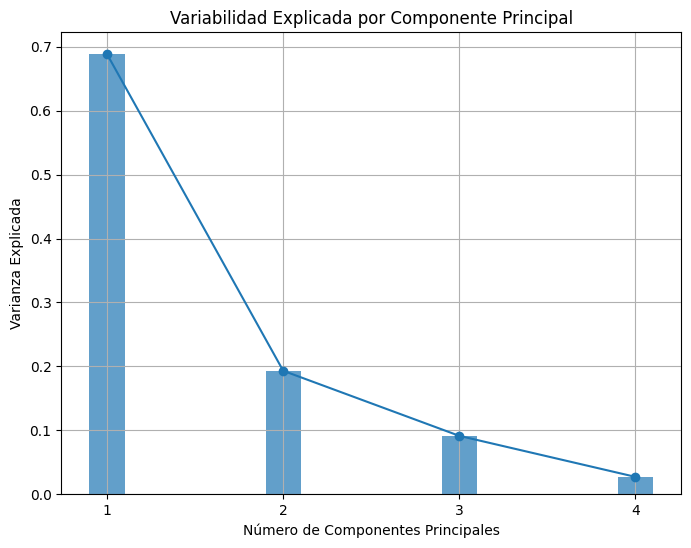

In [164]:
def plot_varianza_explicada(var_explicada, n_components):
    num_componentes_range = np.arange (1, n_components + 1)
    plt.figure(figsize =(8, 6))
    plt.plot (num_componentes_range, var_explicada , marker ='o')
    plt.xlabel ('Número de Componentes Principales')
    plt.ylabel ('Varianza Explicada')
    plt.title ('Variabilidad Explicada por Componente Principal')
    plt.xticks (num_componentes_range)
    plt.grid(True)
    plt.bar( num_componentes_range , var_explicada , width =0.2 , align ='center', alpha =0.7)
    plt.show()

plot_varianza_explicada(var_explicada , fit.n_components_)

Notamos que con dos componentes principales es posible explicar el 88% de la variabilidad total de las variables originales luego se utilizarán 2 componentes principales

In [165]:
# Definimos el número de componentes principales según el paso exploratorio previo

pca = PCA(n_components =2)
fit = pca.fit(df_est)
autovalores = fit.explained_variance_

# Guardamos los resultados del PCA

resultados_pca = pd.DataFrame(fit.transform(df_est),
                              columns =['Componente {}'.format (i) for i in
                                        range (1, fit.n_components_+1)])

In [166]:
# Autovectores

autovectores = pd.DataFrame (pca.components_.T, columns = ['Autovector {}'.format (i) for i in
                                                           range(1, fit.n_components_+1)],
                             index = ['{} _z'.format(variable) for variable in df.columns ])

autovectores

,Autovector 1,Autovector 2
bill_length_mm _z,0.455250,0.597031
bill_depth_mm _z,-0.400335,0.797767
flipper_length_mm _z,0.576013,0.002282
body_mass_g _z,0.548350,0.084363


In [167]:
# Añadimos las representación en componentes principales al dataframe

Data_z_cp = pd.concat([df_est, resultados_pca], axis =1)
variables_cp = Data_z_cp.columns
Data_z_cp

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Componente 1,Componente 2
0,-0.884499,0.785449,-1.418347,-0.564142,-1.843445,0.047702
1,-0.811126,0.126188,-1.062250,-0.501703,-1.306762,-0.428348
2,-0.664380,0.430462,-0.421277,-1.188532,-1.369181,-0.154476
3,-1.324737,1.089724,-0.563715,-0.938776,-1.878827,-0.002048
4,-0.847812,1.748985,-0.777373,-0.689020,-1.911748,0.829210
...,...,...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175,2.006436,-0.958909
338,0.527932,-1.445897,1.003109,0.809516,1.840886,-0.767714
339,1.188289,-0.735923,1.501644,1.933419,2.760742,0.288886
340,0.234440,-1.192335,0.789451,1.246590,1.722364,-0.704269


In [168]:
# Calculamos las correlaciones con los componentes principales

correlacion = pd.DataFrame(np.corrcoef(df_est.T, resultados_pca.T),
                           index = variables_cp, columns = variables_cp)
n_variables = fit.n_features_
correlaciones_Data_con_cp = correlacion.iloc[:fit.n_features_, fit.n_features_:]

correlaciones_Data_con_cp

,Componente 1,Componente 2
bill_length_mm,0.755463,0.524748
bill_depth_mm,-0.664333,0.701180
flipper_length_mm,0.955862,0.002006
body_mass_g,0.909957,0.074149


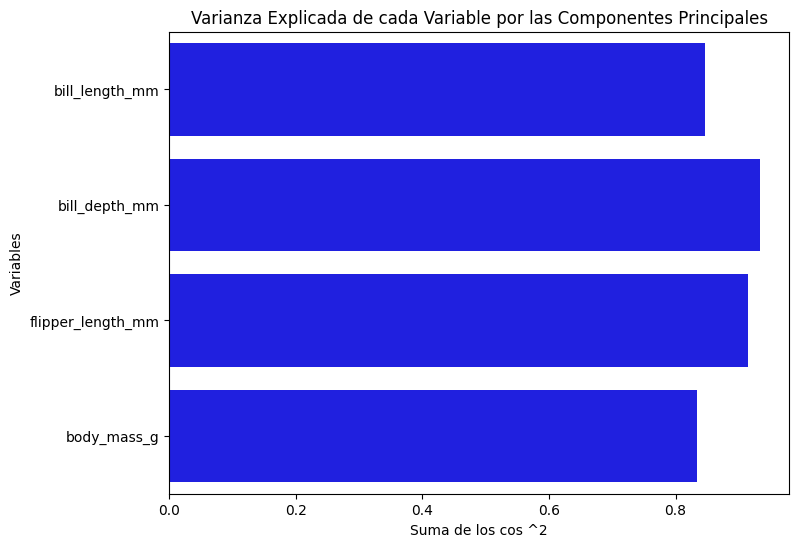

In [169]:
# Elevamos al cuadrado para obtener los cos2 que representan la proporción de variabilidad que las componentes explican de cada variable

def plot_cos2_bars(cos2):
    plt.figure (figsize =(8 , 6))
    sns. barplot (x= cos2.sum(axis =1), y= cos2.index, color ="blue")

    plt. xlabel ('Suma de los cos ^2')
    plt. ylabel ('Variables')

    plt.title ('Varianza Explicada de cada Variable por las Componentes Principales')

    plt.show()

cos2 = correlaciones_Data_con_cp **2
plot_cos2_bars(cos2)

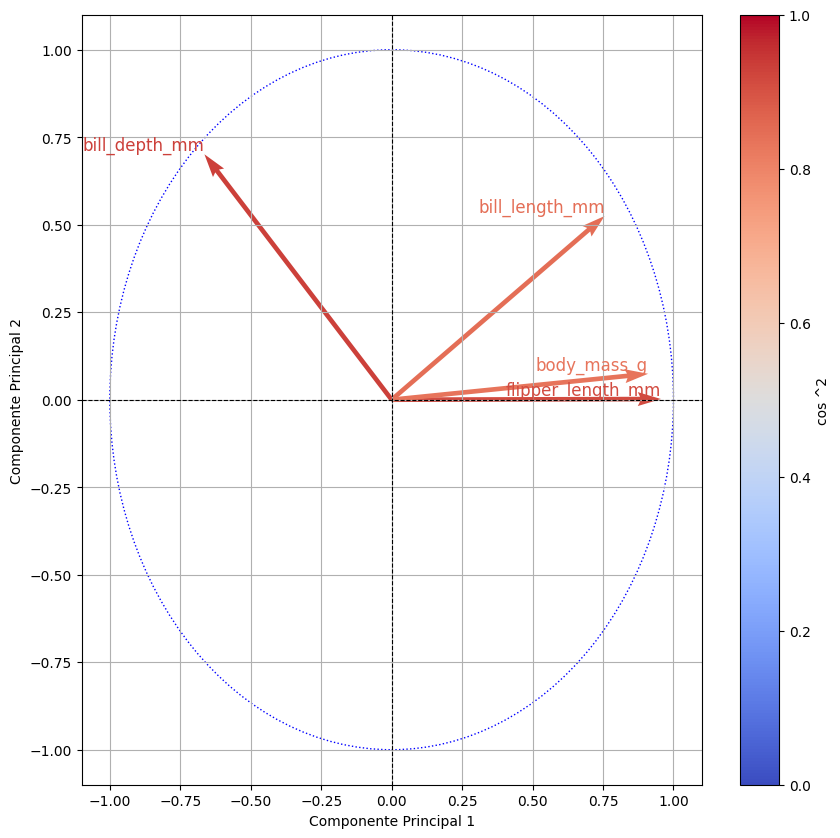

In [170]:
# Graficamos la representación de las variables en el espacio de las componentes principales

def plot_corr_cos( n_components, correlaciones_Data_con_cp):
    cmap = plt.get_cmap('coolwarm')
    for i in range(n_components):
        for j in range (i + 1, n_components):
            sum_cos2 = correlaciones_Data_con_cp.iloc[:, i] ** 2 + correlaciones_Data_con_cp.iloc[:, j] ** 2

            plt.figure(figsize =(10, 10))

            circle = plt. Circle ((0 , 0) , 1, fill =False, color = 'b', linestyle = 'dotted')
            plt.gca().add_patch(circle)

            for k, var_name in enumerate(correlaciones_Data_con_cp.index):
                x = correlaciones_Data_con_cp.iloc[k, i]
                y = correlaciones_Data_con_cp.iloc[k, j]

                color = cmap(sum_cos2[k])

                plt.quiver(0, 0, x, y, angles ='xy', scale_units ='xy', scale =1, color = color )

                plt.text(x, y, var_name, color =color, fontsize =12, ha= 'right', va= 'bottom')


            plt.axhline(0, color ='black', linestyle ='--', linewidth =0.8)
            plt.axvline(0, color ='black', linestyle ='--', linewidth =0.8)

            plt.xlabel(f'Componente Principal {i + 1}')
            plt.ylabel (f'Componente Principal {j + 1}')

            plt.xlim(-1.1, 1.1)
            plt.ylim(-1.1 , 1.1)

            sm = plt.cm.ScalarMappable(cmap = cmap)
            sm.set_array([])
            plt.colorbar(sm, orientation ='vertical', label ='cos ^2')
            plt.grid()
            plt.show()

plot_corr_cos(fit.n_components, correlaciones_Data_con_cp )

Notamos que la longitud de la aleta
y peso corporal están principalmente definidos por la Componente 1, (es natural que
sean ambas variables, puesto que previamente se ha comentado la alta correlación
entre ellas), por otro lado, el tamaño y profundidad del pico se relacionan con ambas
componente principales

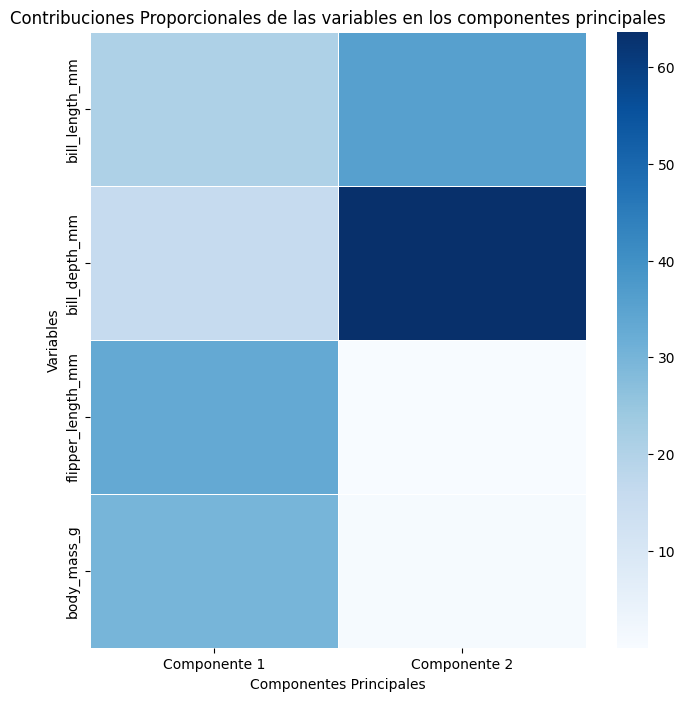

,Componente 1,Componente 2
bill_length_mm,20.725286,35.644619
bill_depth_mm,16.026786,63.643150
flipper_length_mm,33.179135,0.000521
body_mass_g,30.068793,0.711710


In [171]:
# Graficamos la contribuciones proporcionales de las variables en los componentes principales

def plot_contribuciones_proporcionales(cos2, autovalores, n_components):
    contribuciones = cos2 * np.sqrt(autovalores)
    sumas_contribuciones = []

    for i in range (n_components):
        nombre_componente = f'Componente {i + 1}'
        suma_contribucion = np.sum(contribuciones[nombre_componente])
        sumas_contribuciones.append(suma_contribucion)

    contribuciones_proporcionales = contribuciones.div(sumas_contribuciones, axis =1) * 100

    plt.figure (figsize =(8, 8))

    sns.heatmap(contribuciones_proporcionales, cmap = 'Blues', linewidths =0.5, annot = False)

    plt.xlabel('Componentes Principales')
    plt.ylabel ('Variables')

    plt.title('Contribuciones Proporcionales de las variables en los componentes principales')

    plt.show()

    return contribuciones_proporcionales

plot_contribuciones_proporcionales(cos2, autovalores, fit.n_components)

In [172]:
# Creamos un dataframe con los componentes principales y las especies

df_componentes = pd.concat([df_est, resultados_pca], axis =1)
df_componentes_especies = pd.concat([df_componentes, df_especies], axis=1)
df_componentes_especies

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Componente 1,Componente 2,species
0,-0.884499,0.785449,-1.418347,-0.564142,-1.843445,0.047702,Adelie
1,-0.811126,0.126188,-1.062250,-0.501703,-1.306762,-0.428348,Adelie
2,-0.664380,0.430462,-0.421277,-1.188532,-1.369181,-0.154476,Adelie
3,-1.324737,1.089724,-0.563715,-0.938776,-1.878827,-0.002048,Adelie
4,-0.847812,1.748985,-0.777373,-0.689020,-1.911748,0.829210,Adelie
...,...,...,...,...,...,...,...
337,0.601305,-1.750171,0.931890,0.903175,2.006436,-0.958909,Gentoo
338,0.527932,-1.445897,1.003109,0.809516,1.840886,-0.767714,Gentoo
339,1.188289,-0.735923,1.501644,1.933419,2.760742,0.288886,Gentoo
340,0.234440,-1.192335,0.789451,1.246590,1.722364,-0.704269,Gentoo


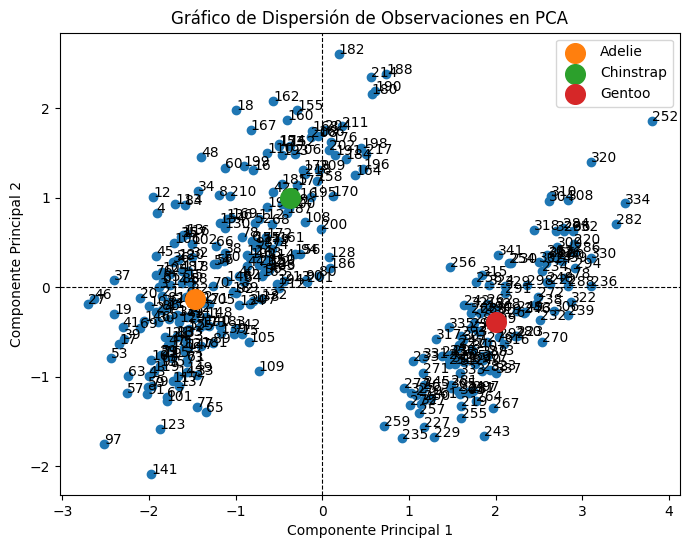

In [178]:
# graficamos las observaciones y los centroides de cada especie en el espacio de las componentes principales

def plot_pca_scatter_with_categories(Data_componentes_especies, componentes_principales, n_components):
    categorias = Data_componentes_especies["species"].unique()

    for i in range (n_components):
        for j in range (i + 1, n_components):
            plt.figure(figsize =(8 , 6))
            plt.scatter(componentes_principales[:, i], componentes_principales[:, j])
            for categoria in categorias :
                observaciones_categoria = componentes_principales[
                    Data_componentes_especies["species"] == categoria]

                centroide = np.mean(observaciones_categoria, axis =0)

                plt.scatter(centroide[i], centroide[j], label = categoria, s=200, marker ='o', zorder = 10)

                etiquetas_de_observaciones = list(Data_componentes_especies.index)

            for k, label in enumerate (etiquetas_de_observaciones):
                plt.annotate(label, (componentes_principales[k, i], componentes_principales[k, j]))

            plt.axhline(0, color = 'black', linestyle = '--', linewidth =0.8)

            plt.axvline(0, color ='black', linestyle = '--', linewidth =0.8)


            plt.xlabel(f'Componente Principal {i + 1}')
            plt.ylabel(f'Componente Principal {j + 1}')

            plt.title('Gráfico de Dispersión de Observaciones en PCA')

            plt.legend()
            plt.show()

componentes_principales = pca.transform(df_est)
plot_pca_scatter_with_categories (df_componentes_especies, componentes_principales, fit.n_components)


En el capítulo 2 de preprocesamiento observamos que el gráfico de dispersión en 3D mostraba aparentemente tres grupos, ahora en el espacio de las componentes principales, observamos los centroides de cada especie, haciendo más evidente los grupos conformados.

**5. CLUSTERING**


En esta sección se aplicará un cluster jerárquico y no jerárquico para agrupar las observaciones, graficando los resultados finales en el espacio de las componentes principales.